# Building A Multilayer Perceptron (from Scratch)

In this project we are going to implement a Multi - Layer Perceptron neural network from scratch using the iris dataset.
We will see how to initialize weights for forward propagation and perform gradient decent for backpropagation.


## 1. Importing Libraries
These are the packages that we will be using within this Neural Network model.

In [1]:
import numpy as np
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
%matplotlib inline



## 2. Reading the dataset
Modify the parameters to correlate with the input dataset.

In [2]:
# load the dataset
iris=pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Our data looks balanced so we don't need to normalize or scale it. Lets check if there is missing data or not.

In [4]:
# checking the percentage of missing data contains in all the columns

missing_percentage = iris.isnull().sum()/iris.shape[0]
print(missing_percentage)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64


Our Data looks really clean. So we do not need any imputation and we can start our EDA and model implementation with this data.

## 3. EDA Analysis

* Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

* It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

* There are 3 types of EDA Analysis, we will do them all step by step.

### 1. Uni-Variate Analysis of the Data

* “Uni” means one and “Variate” means variable hence univariate analysis means analysis of one variable or one feature. Univariate basically tells us how data in each feature is distributed and also tells us about central tendencies like mean, median, and mode.


Text(0, 0.5, 'count')

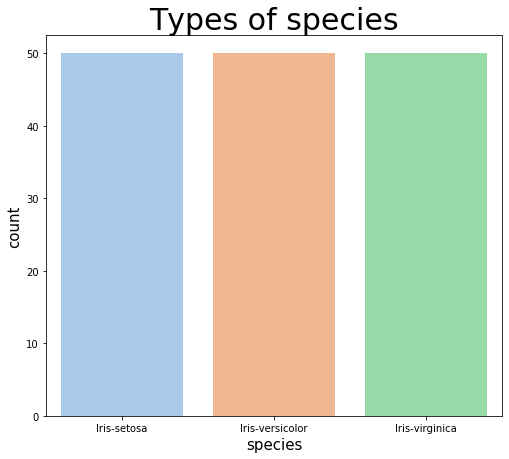

In [5]:
# checking the Distribution of speicies

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(iris['species'], palette = 'pastel')
plt.title('Types of species', fontsize = 30)
plt.xlabel('species', fontsize = 15)
plt.ylabel('count', fontsize = 15)

Instances of all the 3 types of species are equal.

**2. Bi-Variate Analysis**

* Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences. 

* Lets analyze all the features using boxenplots and strip plots.

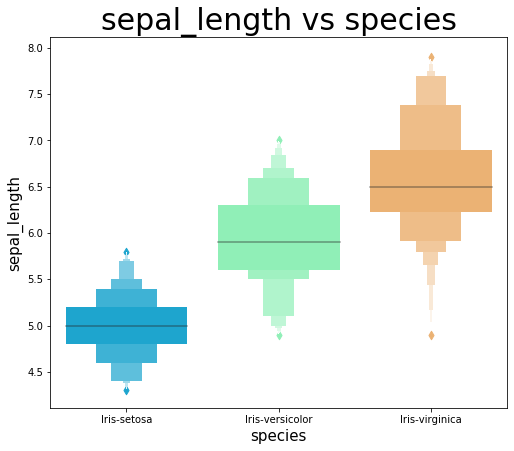

Text(0, 0.5, 'sepal_length')

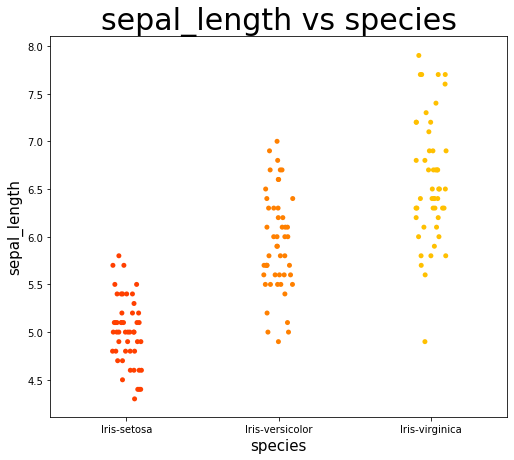

In [6]:
# sepal_length vs species

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(iris['species'], iris['sepal_length'], palette = 'rainbow')
plt.title('sepal_length vs species', fontsize = 30)
plt.xlabel('species', fontsize = 15)
plt.ylabel('sepal_length', fontsize = 15)
plt.show()


plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(iris['species'], iris['sepal_length'], palette = 'autumn')
plt.title('sepal_length vs species', fontsize = 30)
plt.xlabel('species', fontsize = 15)
plt.ylabel('sepal_length', fontsize = 15)



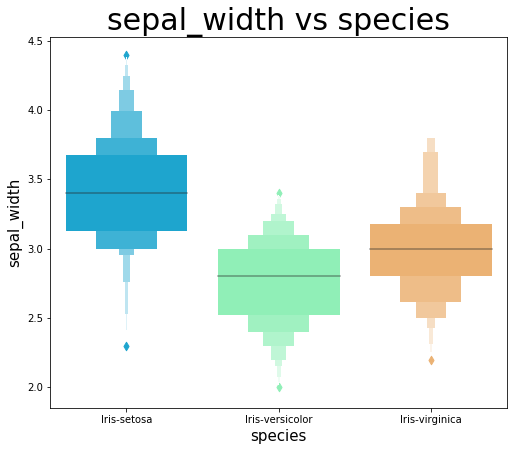

Text(0, 0.5, 'sepal_width')

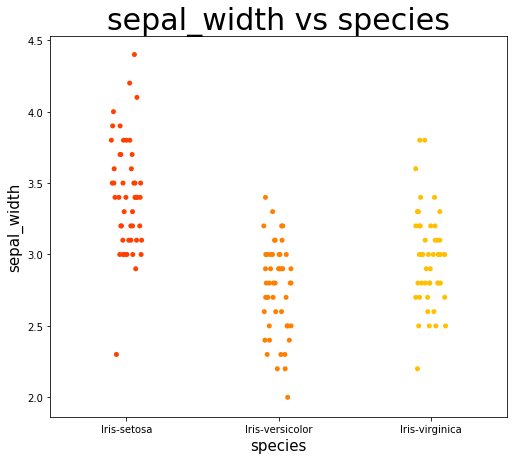

In [7]:
# sepal_width vs species

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(iris['species'], iris['sepal_width'], palette = 'rainbow')
plt.title('sepal_width vs species', fontsize = 30)
plt.xlabel('species', fontsize = 15)
plt.ylabel('sepal_width', fontsize = 15)
plt.show()


plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(iris['species'], iris['sepal_width'], palette = 'autumn')
plt.title('sepal_width vs species', fontsize = 30)
plt.xlabel('species', fontsize = 15)
plt.ylabel('sepal_width', fontsize = 15)



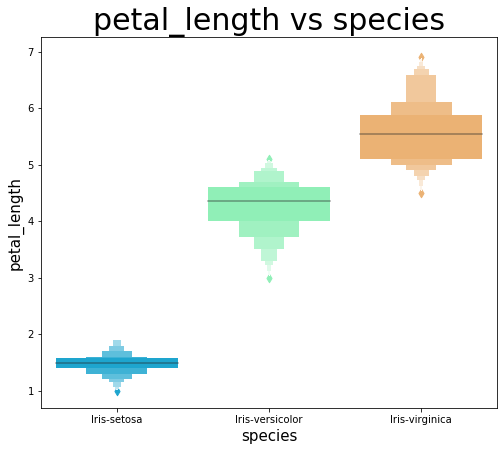

Text(0, 0.5, 'petal_length')

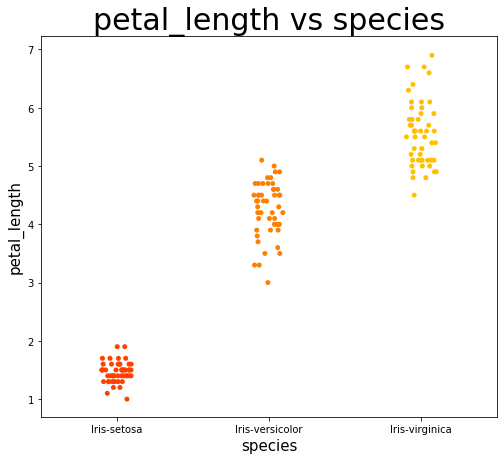

In [8]:
# petal_length vs species

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(iris['species'], iris['petal_length'], palette = 'rainbow')
plt.title('petal_length vs species', fontsize = 30)
plt.xlabel('species', fontsize = 15)
plt.ylabel('petal_length', fontsize = 15)
plt.show()


plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(iris['species'], iris['petal_length'], palette = 'autumn')
plt.title('petal_length vs species', fontsize = 30)
plt.xlabel('species', fontsize = 15)
plt.ylabel('petal_length', fontsize = 15)



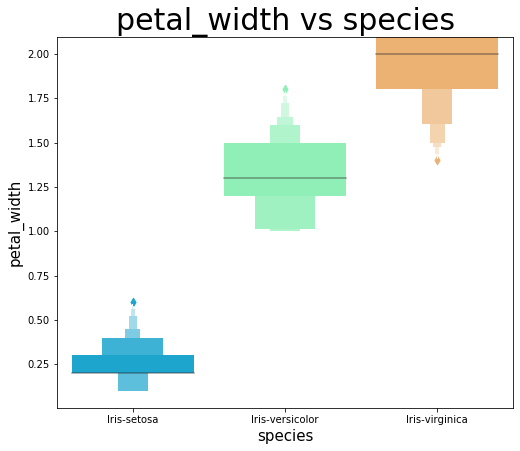

Text(0, 0.5, 'petal_width')

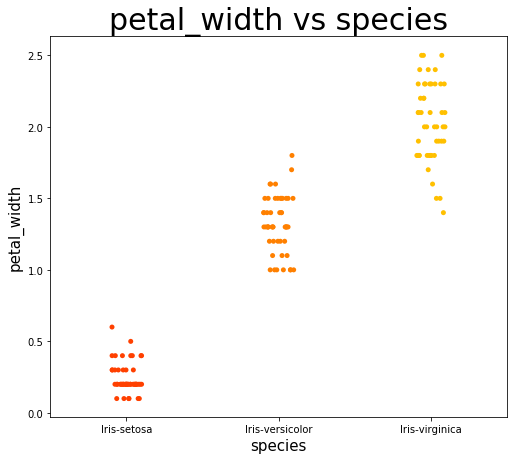

In [9]:
# petal_width vs species

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(iris['species'], iris['petal_width'], palette = 'rainbow')
plt.title('petal_width vs species', fontsize = 30)
plt.xlabel('species', fontsize = 15)
plt.ylabel('petal_width', fontsize = 15)
plt.show()


plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(iris['species'], iris['petal_width'], palette = 'autumn')
plt.title('petal_width vs species', fontsize = 30)
plt.xlabel('species', fontsize = 15)
plt.ylabel('petal_width', fontsize = 15)



### 3. Multi-Variate Analysis

* Multivariate analysis (MVA) is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time. Typically, MVA is used to address the situations where multiple measurements are made on each experimental unit and the relations among these measurements and their structures are important.
* Essentially, multivariate analysis is a tool to find patterns and relationships between several variables simultaneously. It lets us predict the effect a change in one variable will have on other variables. ... This gives multivariate analysis a decisive advantage over other forms of analysis.


Lets analyze all the correlating features using a heatmap.

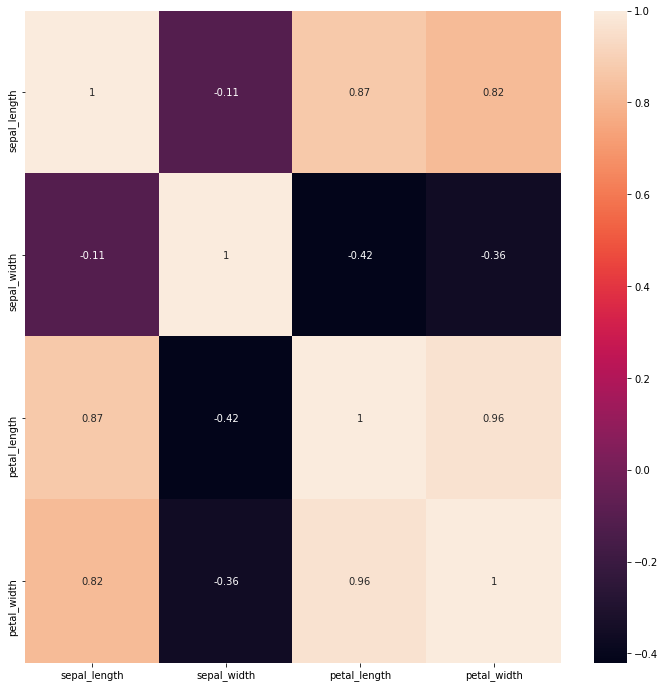

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(iris.corr(),annot=True)

We can see that all the features are strongly correlated with each other except sepal_width

## 4. Data Pre-Processing
Pre-process the data so that it can smoothly run through the Multilayer Perceptron.
Process includes:
1. Establishing numerical values to the label vector (y) using Sklearn's One Hot Encoder. The One Hot encoding provides a binarization of data so that the neural network does not assume a heirarchy between the classes.

2. Split the data into training and testing sets for both the feature vector and label vector.

3. Create total number variables for feature and label vectors in order to calculate random initial weights and biases.

4. Create initial weights and biases as a starting point for the neural network. We'll need a starting point for the weights and biases so that the forward propogation process can begin with these initial values. The values will later be optimized through the backpropogation process (that is where the learning takes place).

In [11]:
# Split Dataset up into feature and label vectors
X = iris.iloc[:,0:3]
y = iris.iloc[:,4]

# learning rate and initial lambda initialization
lr = .0001
init_lam = .01

# modify the epochNum, or number of iterations that our network runs
epochNum = 10000

In [12]:
# Use Sci-Kit's one-hot encoder to transform the classes into numerical values
# to feed into our multilayer perceptron
numVal = array(y)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(numVal)

# encode from integer to binary
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# splitting up training and testing data into appropriate vectors for initial 
# group
X_train, X_test, y_train, y_test = train_test_split(X, onehot_encoded)

# establish the number of labels and features
num_labels = y_train.shape[1]
num_features = X_train.shape[1]

# set size of hidden layer
hidden_nodes = 3 * len(X_train)

# establish the arrays of weights and biases
w1 = np.random.normal(0, 1, [num_features, hidden_nodes]) 
w2 = np.random.normal(0, 1, [hidden_nodes, num_labels]) 

b1 = np.zeros((1, hidden_nodes))
b2 = np.zeros((1, num_labels))

## 5. Functions for the neural network
These functions include:

### * relu_activation -->**
I have chosen the relu activation function as it has a simple implementation and is often very accurate as it solves the vanishing gradient issue with other activation functions. It simply takes the max of 0 and the input vector x. (i.e. max(x, 0))

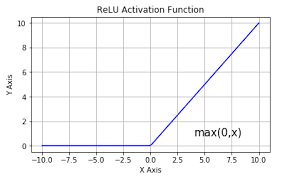

### * softmax -->
The relu activation function only works when used as an activation function on the hidden layers of a neural network, therefore I have chosen to use the softmax activation function for the output layer. The softmax function conveniently places the output values within the range [0, 1]. Since all the probabilities that will go towards the output layer will equal 1, the softmax activation function will choose the classification with the highest probability. Easy as that!

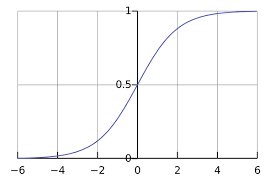



### * forward -->
The neural network will feed forward the input data. The data will be computed at each layer using f(x) = wx + b function as w = weight values, x is input values, and b is the bias of the layer. Then after that value is calculated at each layer, it will be put through the layer's associated activation function to keep moving forward through the neural network.

### * backprop -->
This is the step of the process where the neural network learns, as it identifies the error of the output nodes. This establishes a loss value and a gradient or slope for that value at each node. When the data is fed back through the network, each value goes through gradient descent where the local minimum of its specific gradient is calculated so that it can adjust new values to the parameters of the neural networks to minimize loss the next time data is fed through the network.

In [13]:
# effective activation function of my choosing
def relu_activation(vec):
    return np.maximum(vec, 0)


# returns a vector of output probabilities
def softmax(vec):
    # for softmax we compute input over number of choices
    input = np.exp(vec)
    # output is sum of all of those choices, K
    output = np.sum(input, axis = 1, keepdims = True)
    return input / output


def forward(softmax_vec, onehot_labels, lam, w1, w2):
  
    # first we calculate softmax cross-entropy loss (refer to formula)
    i = np.argmax(onehot_labels, axis = 1).astype(int)
  
    # since softmax output will be probability values (non-integer) we use function
    # arange() 
    predicted = softmax_vec[np.arange(len(softmax_vec)), i]
    logs = np.log(predicted)
    loss = -np.sum(logs) / len(logs)
    
    # second we add regularization to the loss in order to avoid overfitting
    w1_loss = 0.5 * lam * np.sum(w1 * w1)
    w2_loss = 0.5 * lam * np.sum(w2 * w2)
    return (loss + (w1_loss + w2_loss))
  


In [14]:
def backprop(w1, b1, w2, b2, lam, lr, output_vec, hidden_vec):
    output_error = (output_vec - y_train) / output_vec.shape[0]

    hidden_error = np.dot(output_error, w2.T) 
    hidden_error[hidden_vec <= 0] = 0

    gw2 = np.dot(hidden_vec.T, output_error)
    gb2 = np.sum(output_error, axis = 0, keepdims = True)

    gw1 = np.dot(X_train.T, hidden_error)
    gb1 = np.sum(hidden_error, axis = 0, keepdims = True)

    gw2 += lam * w2
    gw1 += lam * w1

    w1 -= lr * gw1
    b1 -= lr * gb1
    w2 -= lr * gw2
    b2 -= lr * gb2

## 6. Training our Model
Here, we establish the amount of iterations that we will feed the data through the network in order to train it and prepare it to make predictions on new data. epochNum in this case is the amount of iterations that we will initialize.

In each iteration, there are a few things that are happening:

1. The values at each layer are being established with respect to that specific layer's activation function.

2. The softmax activation function (in this case) will make a decision on the classificiation it believes is correct from choosing the classification with the highest probability (since the softmax outputs values between [0, 1].)

3. With these established vectors at each layer, we will first feed the data forward through forward propogation to get our output values

4. Then we will adjust our network's parameters in the process of backpropogation so that the network can classify more accurately in the future.

In [15]:
# since we need to return the object 'epoch' in this case we will use xrange()
# rather than range() function in python

for epoch in range(1,epochNum):
    # wx + b
    input = np.dot(X_train, w1) + b1
    hidden = relu_activation(input)
    output = np.dot(hidden, w2) + b2
    soft_output = softmax(output)

    forward(soft_output, y_train, init_lam, w1, w2)
    backprop(w1, b1, w2, b2, init_lam, lr, output, hidden)

## 7. It is time to test the network!

I have defined an eval() function that will put the network's prediction vector up against the actual classes of the data that it was fed. This function pretty much just calculates the correctness by dividing the correct predictions against the total number of rows of data the network evaluated, or total number of predictions it had.

In [16]:
# test

def eval(preds, y):
    ifcorrect =  np.argmax(preds, 1) == np.argmax(y, 1)
    correct_predictions = np.sum(ifcorrect)
    return correct_predictions * 100 / preds.shape[0]
  

input = np.dot(X_test, w1)
hidden = relu_activation(input + b1)
scores = np.dot(hidden, w2) + b2
probs = softmax(scores)
print('Accuracy of Multilayer Perceptron: {0}%'.format(eval(probs, y_test)))

Accuracy of Multilayer Perceptron: 94.73684210526316%


In [17]:
probs[:10],y_test[:10]

(array([[0.26506401, 0.53331458, 0.2016214 ],
        [0.22127049, 0.20582125, 0.57290826],
        [0.57590847, 0.22609986, 0.19799168],
        [0.23345719, 0.55534283, 0.21119998],
        [0.24751936, 0.17796742, 0.57451322],
        [0.23982677, 0.53720596, 0.22296727],
        [0.23259399, 0.25102867, 0.51637734],
        [0.27138031, 0.43161631, 0.29700338],
        [0.24751936, 0.17796742, 0.57451322],
        [0.30970449, 0.23651799, 0.45377752]]),
 array([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]]))

Since our predictions and target variable is still encoded so to compute the confusion matrix and classification report we have convert them to integers.

In [18]:
# converting y_test and probs to integers

rounded_probs=np.argmax(probs, axis=1)
rounded_probs[1]
rounded_y_test=np.argmax(y_test, axis=1)
rounded_y_test[1]

2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.90      0.90        10
           2       0.94      0.94      0.94        16

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



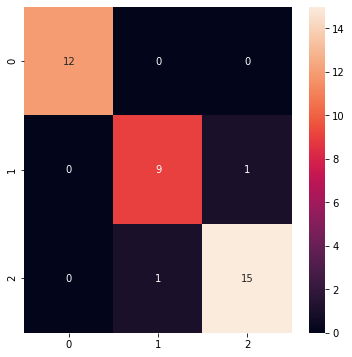

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# confusion matrix
cm = confusion_matrix(rounded_y_test, rounded_probs)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(rounded_y_test, rounded_probs)
print(cr)

You can change the hyperparameters like learning rate, no. of epochs, etc. in code above to observe the differences.

## 8. Conclusion

In [20]:
# write your conclusions here